In [15]:
import cv2
import numpy as np
def decode_depth_from_rgb(rgb_image):
    print(rgb_image.max(),rgb_image.min(),rgb_image.mean())
    """
    从编码的RGB图像恢复16位深度图
    输入：BGR格式图像，B通道全0，G通道低8位，R通道高8位
    """
    b, g, r = cv2.split(rgb_image)
    print("r=",r)
    print("g=",g)
    print("b=",b)
    print("解码")
    print("R channel - max:", r.max(), "min:", r.min(), "mean:", r.mean())
    print("G channel - max:", g.max(), "min:", g.min(), "mean:", g.mean())
    print("B channel - max:", b.max(), "min:", b.min(), "mean:", b.mean())
    # 理论上 b 通道应该全0，可用作校验
    depth_uint16 = (r.astype(np.uint16) << 8) | g.astype(np.uint16)
    return depth_uint16

In [16]:
import numpy as np
depth_encoded_path='frame_000000.png'
read_encoded = cv2.imread(depth_encoded_path,cv2.IMREAD_UNCHANGED)
depth_decoded = decode_depth_from_rgb(read_encoded)

255 0 40.57978732638889
r= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
g= [[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 203 203   0]
 [  0   0   0 ... 203 203   0]
 ...
 [  0   0   0 ...  73  73   0]
 [  0   0   0 ...  72   0   0]
 [  0   0   0 ...   0   0   0]]
b= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
解码
R channel - max: 65 min: 0 mean: 1.2974055989583333
G channel - max: 255 min: 0 mean: 120.44195638020834
B channel - max: 0 min: 0 mean: 0.0


In [18]:
print(read_encoded.shape)

(480, 640, 3)


In [22]:
print(read_encoded[220][230][0])
print(read_encoded[220][230][1])
print(read_encoded[220][230][2])

0
43
2


In [23]:
np.savetxt(
        'output_cv2.txt',       # 文件名
        read_encoded,               # 数组数据
        delimiter=',',       # 分隔符：逗号（默认空格）
        header='Data Start', # 文件头注释
        footer='Data End'    # 文件尾注释
    )

ValueError: Expected 1D or 2D array, got 3D array instead

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并确保尺寸一致
img1 = cv2.imread('output_rgb.png')
img2 = cv2.imread('frame_000000.png')
assert img1.shape == img2.shape, "图片尺寸不一致"

# 计算每个通道的绝对差异
diff = cv2.absdiff(img1, img2)

# 分离通道并分析
b_diff, g_diff, r_diff = cv2.split(diff)

import cv2
import numpy as np

# 应用中值滤波到每个通道
kernel_size = 3  # 可尝试3或5
b_denoised = cv2.medianBlur(b_diff, kernel_size)
g_denoised = cv2.medianBlur(g_diff, kernel_size)
r_denoised = cv2.medianBlur(r_diff, kernel_size)

# 合并处理后的通道
combined_denoised = cv2.merge((b_denoised, g_denoised, r_denoised))

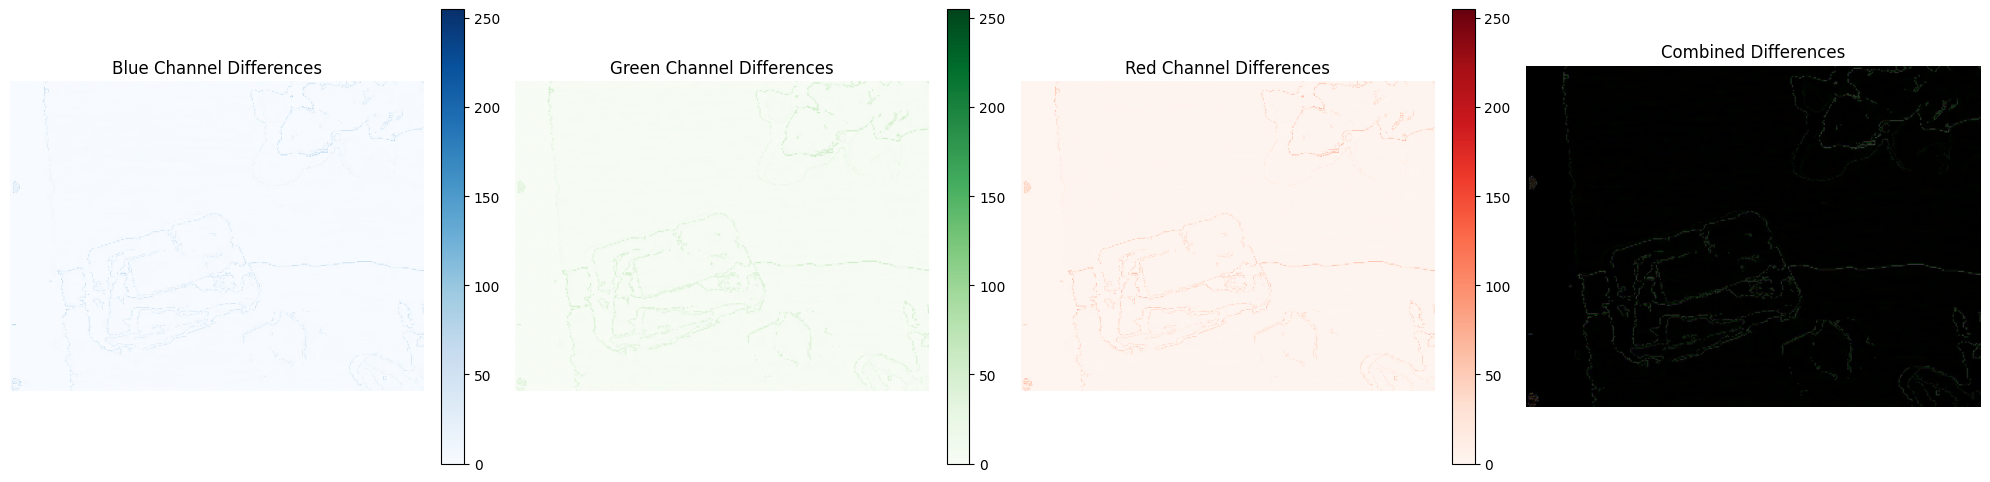

In [ ]:
import cv2
import numpy as np

# 读取图像并确保尺寸一致
img1 = cv2.imread('output_rgb.png')
img2 = cv2.imread('frame_000000.png')
assert img1.shape == img2.shape, "图片尺寸不一致"

# 计算每个通道的绝对差异
diff = cv2.absdiff(img1, img2)

# 分离通道并分析
b_diff, g_diff, r_diff = cv2.split(diff)


# 可视化差异（合并为彩色差异图）
diff_visual = cv2.merge((b_diff, g_diff, r_diff))
cv2.imshow('Channel Differences', diff_visual)
cv2.waitKey(0)

In [3]:
import cv2
img1 = cv2.imread('output_rgb.png')
img2 = cv2.imread('frame_000000.png')

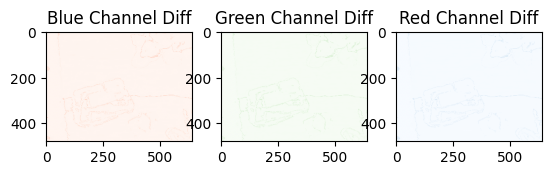

In [4]:
import matplotlib.pyplot as plt
import cv2
# 计算差异（OpenCV读图）
diff = cv2.absdiff(img1, img2)
b_diff, g_diff, r_diff = cv2.split(diff)

# 绘制各通道差异热力图
fig, axes = plt.subplots(1, 3)
axes[0].imshow(b_diff, cmap='Reds', vmin=0, vmax=255)
axes[0].set_title('Blue Channel Diff')
axes[1].imshow(g_diff, cmap='Greens', vmin=0, vmax=255)
axes[1].set_title('Green Channel Diff')
axes[2].imshow(r_diff, cmap='Blues', vmin=0, vmax=255)
axes[2].set_title('Red Channel Diff')
plt.show()

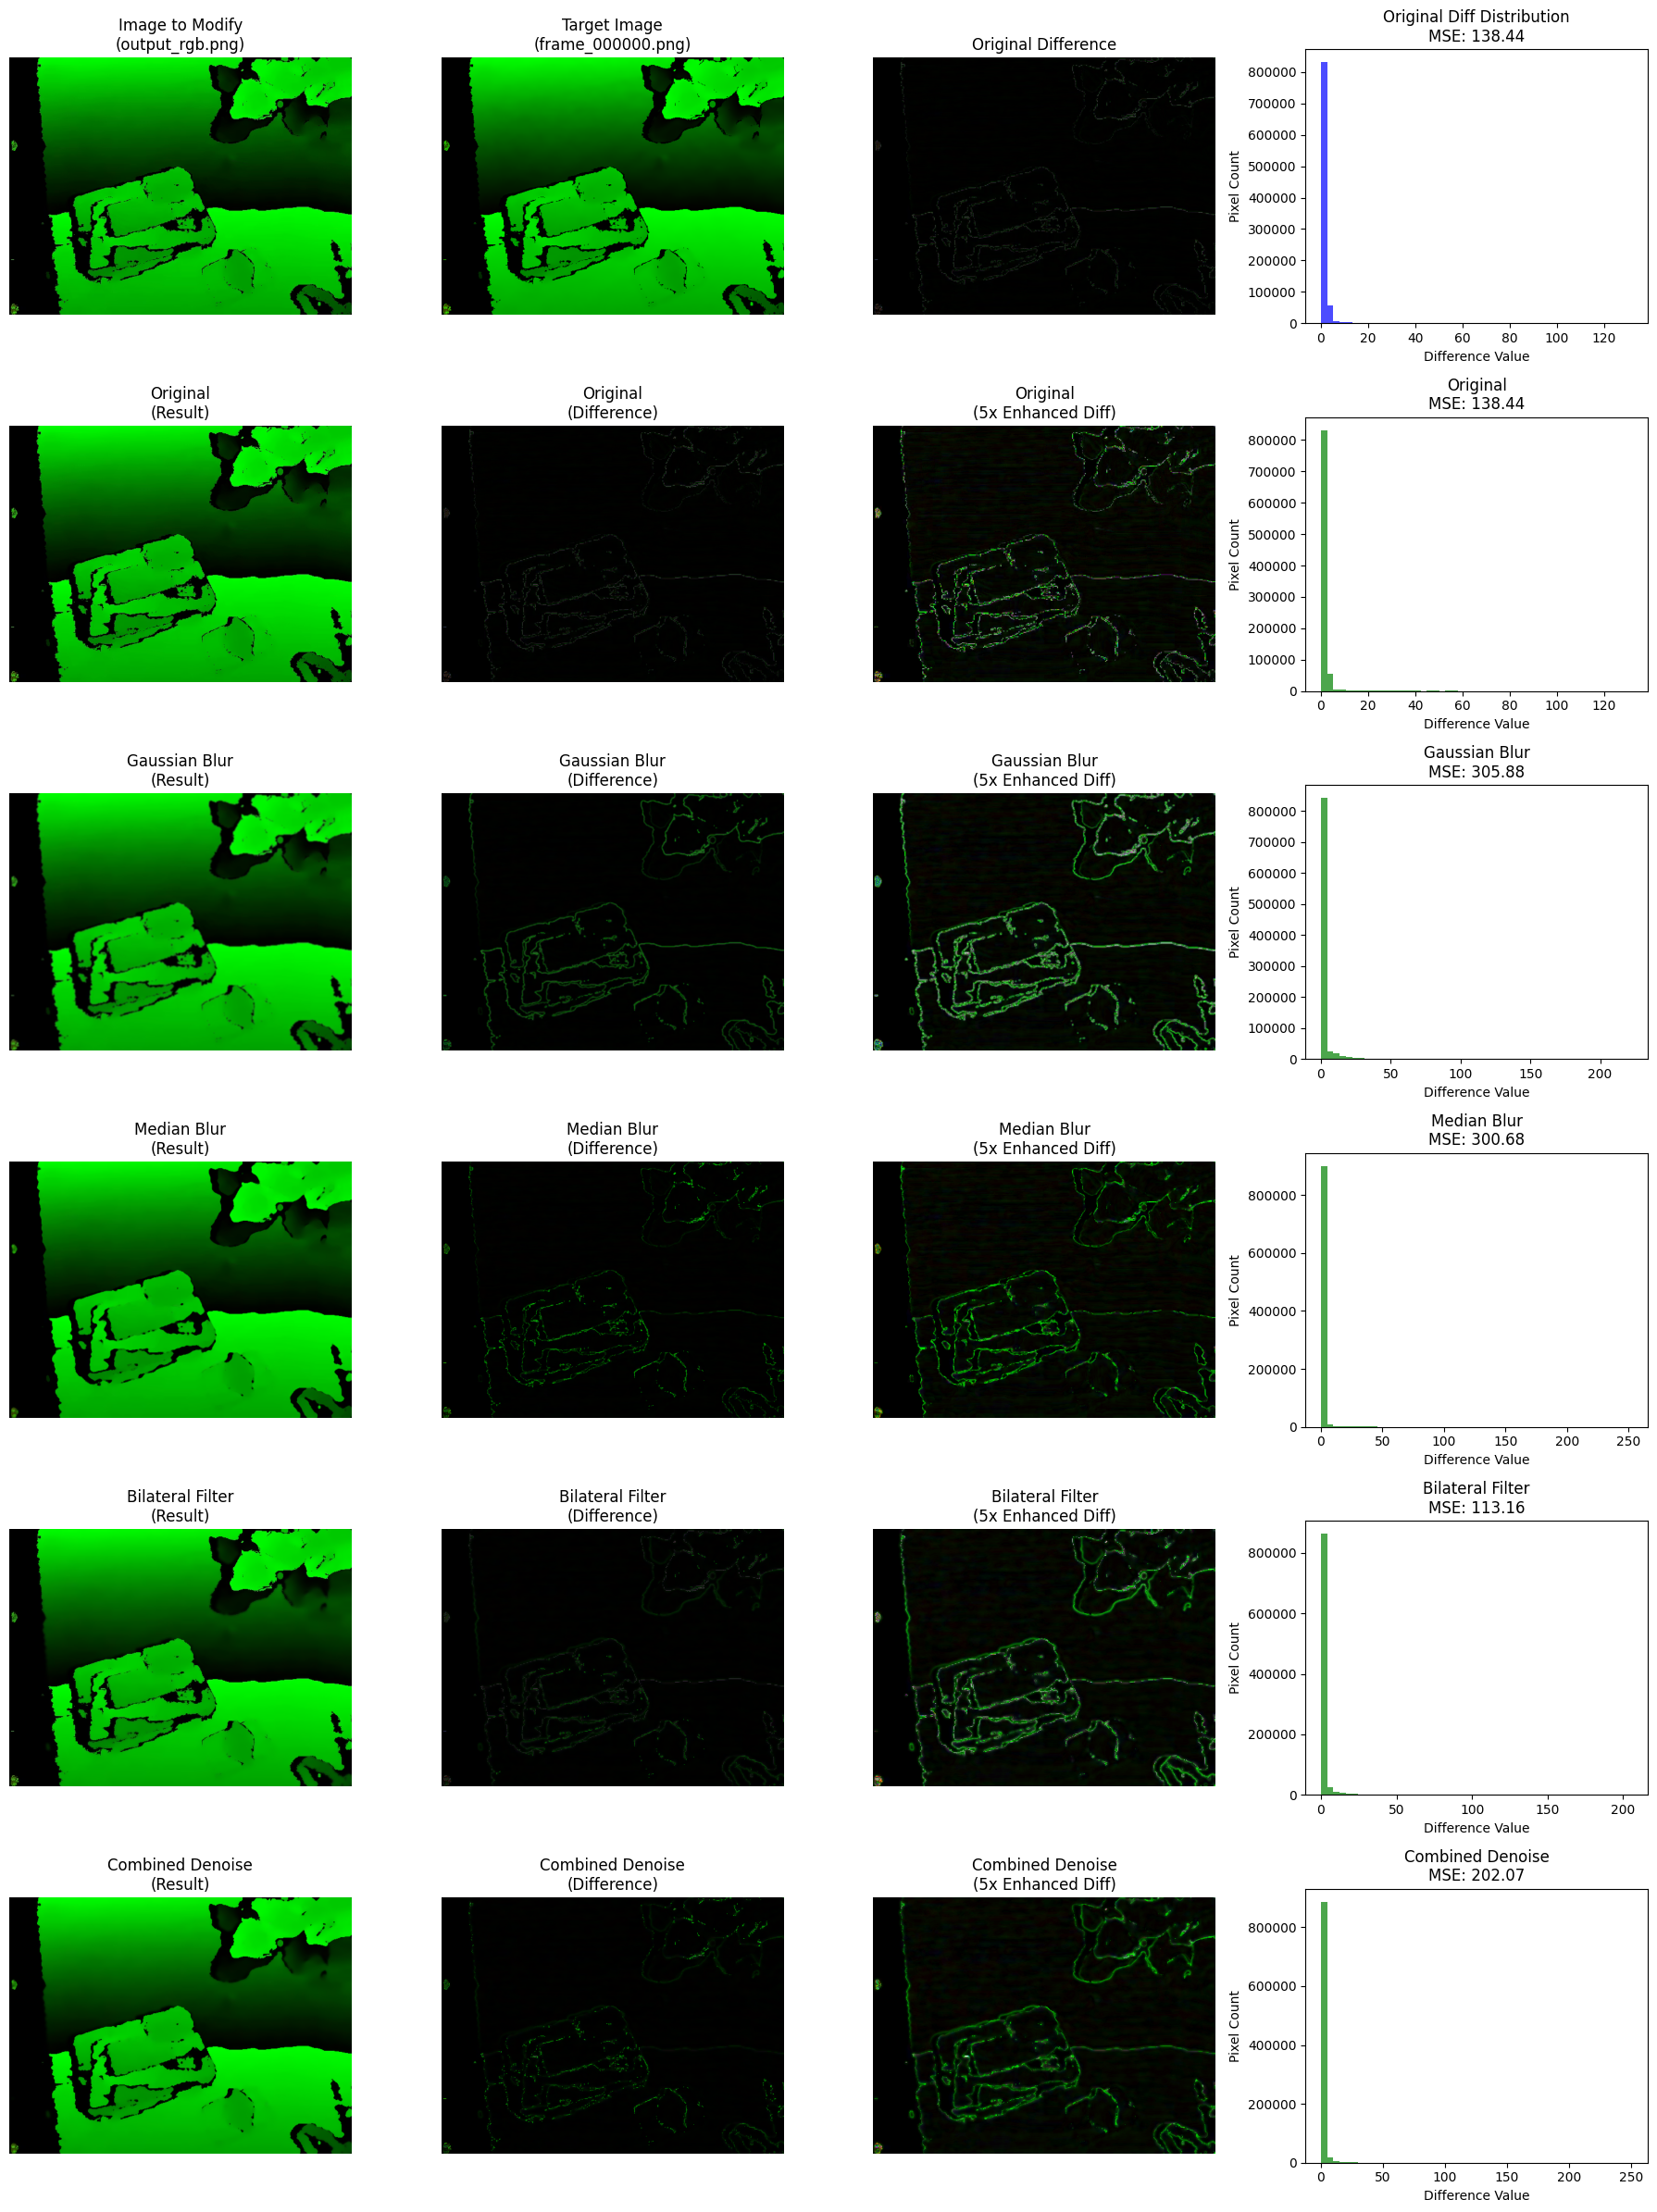

Saved best denoising result: denoised_output_rgb.png
MSE values for each scheme:
1. Original: 138.44
2. Gaussian Blur: 305.88
3. Median Blur: 300.68
4. Bilateral Filter: 113.16
5. Combined Denoise: 202.07


In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Read images
img_target = cv2.imread('frame_000000.png')  # Target image
img_to_modify = cv2.imread('output_rgb.png')  # Image to modify

# Ensure dimensions match
assert img_target.shape == img_to_modify.shape, "Image dimensions differ"

# 2. Define image processing functions
def calculate_diff(img1, img2):
    """Calculate and return difference map"""
    diff = cv2.absdiff(img1, img2)
    return diff

def apply_gaussian(img, ksize=5, sigma=0):
    """Apply Gaussian blur"""
    return cv2.GaussianBlur(img, (ksize, ksize), sigma)

def apply_median(img, ksize=5):
    """Apply median blur"""
    return cv2.medianBlur(img, ksize)

def apply_bilateral(img, d=9, sigma_color=75, sigma_space=75):
    """Apply bilateral filtering"""
    return cv2.bilateralFilter(img, d, sigma_color, sigma_space)

def apply_combined_denoise(img, median_ksize=3, bilateral_d=9):
    """Combined denoising scheme (median + bilateral)"""
    # Apply median filtering to remove salt-and-pepper noise
    img_median = cv2.medianBlur(img, median_ksize)
    # Apply bilateral filtering to preserve edges
    img_denoised = cv2.bilateralFilter(img_median, bilateral_d, 50, 50)
    return img_denoised

def calculate_mse(img1, img2):
    """Calculate Mean Squared Error (MSE)"""
    err = np.sum((img1.astype("float") - img2.astype("float")) ** 2)
    err /= float(img1.shape[0] * img1.shape[1])
    return err

# 3. Apply different denoising schemes and compare
results = []

# Scheme 0: Original image (as baseline)
diff_original = calculate_diff(img_to_modify, img_target)
results.append(("Original", img_to_modify, diff_original, calculate_mse(img_to_modify, img_target)))

# Scheme 1: Gaussian blur
img_gaussian = apply_gaussian(img_to_modify)
diff_gaussian = calculate_diff(img_gaussian, img_target)
results.append(("Gaussian Blur", img_gaussian, diff_gaussian, calculate_mse(img_gaussian, img_target)))

# Scheme 2: Median blur
img_median = apply_median(img_to_modify)
diff_median = calculate_diff(img_median, img_target)
results.append(("Median Blur", img_median, diff_median, calculate_mse(img_median, img_target)))

# Scheme 3: Bilateral filtering
img_bilateral = apply_bilateral(img_to_modify)
diff_bilateral = calculate_diff(img_bilateral, img_target)
results.append(("Bilateral Filter", img_bilateral, diff_bilateral, calculate_mse(img_bilateral, img_target)))

# Scheme 4: Combined denoising
img_combined = apply_combined_denoise(img_to_modify)
diff_combined = calculate_diff(img_combined, img_target)
results.append(("Combined Denoise", img_combined, diff_combined, calculate_mse(img_combined, img_target)))

# 4. Visualize results
plt.figure(figsize=(18, 24))

# Show original and target images
plt.subplot(len(results) + 1, 4, 1)
plt.imshow(cv2.cvtColor(img_to_modify, cv2.COLOR_BGR2RGB))
plt.title("Image to Modify\n(output_rgb.png)")
plt.axis('off')

plt.subplot(len(results) + 1, 4, 2)
plt.imshow(cv2.cvtColor(img_target, cv2.COLOR_BGR2RGB))
plt.title("Target Image\n(frame_000000.png)")
plt.axis('off')

plt.subplot(len(results) + 1, 4, 3)
plt.imshow(cv2.cvtColor(diff_original, cv2.COLOR_BGR2RGB))
plt.title("Original Difference")
plt.axis('off')

plt.subplot(len(results) + 1, 4, 4)
plt.hist(diff_original.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Original Diff Distribution\nMSE: {:.2f}".format(results[0][3]))
plt.xlabel("Difference Value")
plt.ylabel("Pixel Count")

# Show processing results for each method
for i, (title, img_processed, diff_img, mse) in enumerate(results):
    row = i + 1  # +1 because first row is original and target images
    
    # Show processed image
    plt.subplot(len(results) + 1, 4, row*4 + 1)
    plt.imshow(cv2.cvtColor(img_processed, cv2.COLOR_BGR2RGB))
    plt.title(f"{title}\n(Result)")
    plt.axis('off')
    
    # Show difference map
    plt.subplot(len(results) + 1, 4, row*4 + 2)
    plt.imshow(cv2.cvtColor(diff_img, cv2.COLOR_BGR2RGB))
    plt.title(f"{title}\n(Difference)")
    plt.axis('off')
    
    # Show 5x enhanced difference map
    diff_enhanced = np.clip(diff_img * 5, 0, 255).astype(np.uint8)
    plt.subplot(len(results) + 1, 4, row*4 + 3)
    plt.imshow(cv2.cvtColor(diff_enhanced, cv2.COLOR_BGR2RGB))
    plt.title(f"{title}\n(5x Enhanced Diff)")
    plt.axis('off')
    
    # Show difference distribution histogram
    plt.subplot(len(results) + 1, 4, row*4 + 4)
    plt.hist(diff_img.ravel(), bins=50, color='green', alpha=0.7)
    plt.title(f"{title}\nMSE: {mse:.2f}")
    plt.xlabel("Difference Value")
    plt.ylabel("Pixel Count")

plt.tight_layout()
plt.savefig('denoising_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Save best result (combined denoising)
cv2.imwrite('denoised_output_rgb.png', img_combined)
cv2.imwrite('img_bilateral.png',img_bilateral)
print("Saved best denoising result: denoised_output_rgb.png")
print("MSE values for each scheme:")
for i, (title, _, _, mse) in enumerate(results):
    print(f"{i+1}. {title}: {mse:.2f}")

In [74]:
import cv2
import numpy as np

# 读取原图
img = cv2.imread('output_rgb.png')  # Target image

# 转灰度检测边缘
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# 扩展边缘（可调节膨胀核大小）
kernel = np.ones((3, 3), np.uint8)
edges_dilated = cv2.dilate(edges, kernel, iterations=1)

# 创建边缘掩膜
mask = edges_dilated > 0

# 对边缘区域模糊处理（或均值处理）
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# 把非边缘区域从原图保留，边缘区域用模糊结果填充
output = img.copy()
output[mask] = blurred[mask]

# 保存结果
cv2.imwrite('img2_edge_removed.png', output)


True

In [1]:
import cv2
import numpy as np

def compute_error_metrics(gt, pred, label):
    diff = np.abs(gt.astype(np.int16) - pred.astype(np.int16))
    print(f"[{label}]")
    print(f"最大误差: {diff.max()}")
    print(f"平均误差: {diff.mean():.2f}")
    print(f"误差为0的像素占比: {(diff == 0).sum() / diff.size:.2%}")
    print(f"误差大于50的像素占比: {(diff > 50).sum() / diff.size:.2%}")
    print()

# === 1. 读取图像并提取 B 通道 ===
img_orig = cv2.imread("frame_000000.png")      # 原始图像
img_encoded = cv2.imread("output_rgb.png")     # 编码后图像

b_orig = img_orig[:, :, 0]      # B通道是 index 0
b_encoded = img_encoded[:, :, 0]

# === 2. 对编码图做边缘处理后，与原图B通道比较 ===

# --- Sobel ---
sobelx = cv2.Sobel(b_encoded, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(b_encoded, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = np.sqrt(sobelx**2 + sobely**2)
sobel_edge = np.uint8(np.clip(sobel_edge / sobel_edge.max() * 255, 0, 255)) if sobel_edge.max() > 0 else np.zeros_like(b_encoded)

# --- Laplacian ---
laplacian = cv2.Laplacian(b_encoded, cv2.CV_64F)
laplacian_edge = np.abs(laplacian)
laplacian_edge = np.uint8(np.clip(laplacian_edge / laplacian_edge.max() * 255, 0, 255)) if laplacian_edge.max() > 0 else np.zeros_like(b_encoded)

# --- Canny ---
canny_edge = cv2.Canny(b_encoded, 50, 150)

# === 3. 与原始 B 通道比较误差 ===
compute_error_metrics(b_orig, sobel_edge, "Sobel 边缘图 vs 原图B通道")
compute_error_metrics(b_orig, laplacian_edge, "Laplacian 边缘图 vs 原图B通道")
compute_error_metrics(b_orig, canny_edge, "Canny 边缘图 vs 原图B通道")


[Sobel 边缘图 vs 原图B通道]
最大误差: 255
平均误差: 5.06
误差为0的像素占比: 67.75%
误差大于50的像素占比: 3.60%

[Laplacian 边缘图 vs 原图B通道]
最大误差: 255
平均误差: 2.40
误差为0的像素占比: 80.54%
误差大于50的像素占比: 1.18%

[Canny 边缘图 vs 原图B通道]
最大误差: 255
平均误差: 7.99
误差为0的像素占比: 96.86%
误差大于50的像素占比: 3.14%



In [9]:
import cv2
import numpy as np

def compute_error_metrics(recovered, reference, name="对比结果"):
    diff = np.abs(recovered.astype(np.int16) - reference.astype(np.int16))
    max_err = diff.max()
    mean_err = diff.mean()
    zero_pct = (diff == 0).sum() / diff.size
    over_50_pct = (diff > 10).sum() / diff.size

    print(f"[{name}]")
    print(f"最大误差: {max_err}")
    print(f"平均误差: {mean_err:.2f}")
    print(f"误差为0的像素占比: {zero_pct:.2%}")
    print(f"误差大于50的像素占比: {over_50_pct:.2%}")
    print()

# 读取图像
img_orig = cv2.imread('frame_000000.png')       # 原始图像
img_encoded = cv2.imread('output_rgb.png')      # 编码后图像

# 提取 B 通道（注意 OpenCV 是 BGR 顺序）
b_orig = img_orig[:, :, 0]
b_encoded = img_encoded[:, :, 0]

# ---- Laplacian 处理 ----
# 对编码图 B 通道进行 Laplacian 操作
laplacian_encoded = cv2.Laplacian(b_encoded, cv2.CV_64F, ksize=1)

# 尝试还原图像：简单方式（只是实验性质）
# 注意：这是**边缘增强图**，并不是严格意义上的原图还原，但你要的是恢复效果的误差对比
b_restored = b_encoded - laplacian_encoded
b_restored = np.clip(b_restored, 0, 255).astype(np.uint8)

# ---- 计算误差 ----
compute_error_metrics(b_restored, b_orig, "Laplacian增强图 vs 原图B通道")


[Laplacian增强图 vs 原图B通道]
最大误差: 255
平均误差: 3.08
误差为0的像素占比: 84.08%
误差大于50的像素占比: 2.67%



In [10]:
import cv2
import numpy as np

def compute_error_metrics(recovered, reference, name="对比结果"):
    diff = np.abs(recovered.astype(np.int16) - reference.astype(np.int16))
    max_err = diff.max()
    mean_err = diff.mean()
    zero_pct = (diff == 0).sum() / diff.size
    over_50_pct = (diff > 10).sum() / diff.size

    print(f"[{name}]")
    print(f"最大误差: {max_err}")
    print(f"平均误差: {mean_err:.2f}")
    print(f"误差为0的像素占比: {zero_pct:.2%}")
    print(f"误差大于10的像素占比: {over_50_pct:.2%}")
    print()

# 读取图像
img_orig = cv2.imread('frame_000000.png')
img_encoded = cv2.imread('output_rgb.png')

b_orig = img_orig[:, :, 0]
b_encoded = img_encoded[:, :, 0]

# -------------------------------
# 方式 1: 原始 Laplacian
lap_orig = cv2.Laplacian(b_encoded, cv2.CV_64F, ksize=1)
b_restored_1 = b_encoded - lap_orig
b_restored_1 = np.clip(b_restored_1, 0, 255).astype(np.uint8)
compute_error_metrics(b_restored_1, b_orig, "原始Laplacian还原")

# -------------------------------
# 方式 2: GaussianBlur + Laplacian
blur_gaussian = cv2.GaussianBlur(b_encoded, (3, 3), 0)
lap_gauss = cv2.Laplacian(blur_gaussian, cv2.CV_64F, ksize=1)
b_restored_2 = b_encoded - lap_gauss
b_restored_2 = np.clip(b_restored_2, 0, 255).astype(np.uint8)
compute_error_metrics(b_restored_2, b_orig, "GaussianBlur优化还原")

# -------------------------------
# 方式 3: BilateralFilter + Laplacian
blur_bilateral = cv2.bilateralFilter(b_encoded, d=5, sigmaColor=75, sigmaSpace=75)
lap_bilateral = cv2.Laplacian(blur_bilateral, cv2.CV_64F, ksize=1)
b_restored_3 = b_encoded - lap_bilateral
b_restored_3 = np.clip(b_restored_3, 0, 255).astype(np.uint8)
compute_error_metrics(b_restored_3, b_orig, "BilateralFilter优化还原")

# -------------------------------
# 方式 4: EdgePreservingFilter + Laplacian
# 需要先转换为3通道图像
b_encoded_color = cv2.merge([b_encoded]*3)
filtered_ep = cv2.edgePreservingFilter(b_encoded_color, flags=1, sigma_s=60, sigma_r=0.4)
b_ep_filtered = filtered_ep[:, :, 0]
lap_ep = cv2.Laplacian(b_ep_filtered, cv2.CV_64F, ksize=1)
b_restored_4 = b_encoded - lap_ep
b_restored_4 = np.clip(b_restored_4, 0, 255).astype(np.uint8)
compute_error_metrics(b_restored_4, b_orig, "EdgePreservingFilter优化还原")


[原始Laplacian还原]
最大误差: 255
平均误差: 3.08
误差为0的像素占比: 84.08%
误差大于10的像素占比: 2.67%

[GaussianBlur优化还原]
最大误差: 192
平均误差: 1.65
误差为0的像素占比: 81.79%
误差大于10的像素占比: 2.38%

[BilateralFilter优化还原]
最大误差: 255
平均误差: 1.53
误差为0的像素占比: 82.36%
误差大于10的像素占比: 2.58%

[EdgePreservingFilter优化还原]
最大误差: 255
平均误差: 2.14
误差为0的像素占比: 79.67%
误差大于10的像素占比: 1.94%



In [11]:
import cv2
import numpy as np

def compute_error_metrics(recovered, reference, name="对比结果"):
    diff = np.abs(recovered.astype(np.int16) - reference.astype(np.int16))
    max_err = diff.max()
    mean_err = diff.mean()
    zero_pct = (diff == 0).sum() / diff.size
    over_10_pct = (diff > 10).sum() / diff.size

    print(f"[{name}]")
    print(f"最大误差: {max_err}")
    print(f"平均误差: {mean_err:.2f}")
    print(f"误差为0的像素占比: {zero_pct:.2%}")
    print(f"误差大于10的像素占比: {over_10_pct:.2%}")
    print()

# 读取图像
img_orig = cv2.imread('frame_000000.png')       # 原始图像（仅用于误差评估）
img_encoded = cv2.imread('output_rgb.png')      # 编码图像

# 提取 B 通道
b_orig = img_orig[:, :, 0]
b_encoded = img_encoded[:, :, 0]

# ---------- Step 1: BilateralFilter 去噪 ----------
b_filtered = cv2.bilateralFilter(b_encoded, d=5, sigmaColor=75, sigmaSpace=75)

# ---------- Step 2: Laplacian 边缘增强 ----------
laplacian = cv2.Laplacian(b_filtered, cv2.CV_64F, ksize=1)
b_restored = b_encoded - laplacian
b_restored = np.clip(b_restored, 0, 255).astype(np.uint8)
compute_error_metrics(b_restored, b_orig, "BilateralFilter 优化还原")

# ---------- Step 3: medianBlur 平滑 ----------
b_median = cv2.medianBlur(b_restored, 3)
compute_error_metrics(b_median, b_orig, "Bilateral + medianBlur优化")

# ---------- Step 4: 无需原图的局部跳变检测补偿 ----------
# 通过 Sobel 梯度检测局部变化剧烈的区域（可能是失真）
sobel_x = cv2.Sobel(b_median, cv2.CV_16S, 1, 0, ksize=3)
sobel_y = cv2.Sobel(b_median, cv2.CV_16S, 0, 1, ksize=3)
gradient = cv2.convertScaleAbs(cv2.magnitude(sobel_x.astype(np.float32), sobel_y.astype(np.float32)))

# 创建掩码：局部梯度大于阈值的位置（跳变像素）
jump_mask = (gradient > 40)  # 阈值可调

# 替换这些像素为局部均值
b_local_avg = cv2.blur(b_median, (3, 3))
b_final = b_median.copy()
b_final[jump_mask] = b_local_avg[jump_mask]

compute_error_metrics(b_final, b_orig, "Bilateral + medianBlur + 局部跳变补偿")


[BilateralFilter 优化还原]
最大误差: 255
平均误差: 1.53
误差为0的像素占比: 82.36%
误差大于10的像素占比: 2.58%

[Bilateral + medianBlur优化]
最大误差: 101
平均误差: 0.51
误差为0的像素占比: 84.88%
误差大于10的像素占比: 0.86%

[Bilateral + medianBlur + 局部跳变补偿]
最大误差: 100
平均误差: 0.51
误差为0的像素占比: 84.48%
误差大于10的像素占比: 0.80%



In [170]:
import cv2
import numpy as np

def extract_depth_uint16(img):
    """
    将图像中的 B 和 G 通道组合为 16 位深度图。
    """
    b, g, r = cv2.split(img)
    return ((r.astype(np.uint16) << 8) )

def extract_depth_uint162(img):
    """
    将图像中的 B 和 G 通道组合为 16 位深度图。
    """
    b, g, r = cv2.split(img)
    print("假",r[110][220])
    return ((r.astype(np.uint16) << 8))

def main():
    # 读取图像
    
    img1_path = 'frame_000000.png'
    img2_path = 'img2_edge_removed.png'

    img3_path = 'output_rgb.png'

    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    img3 = cv2.imread(img3_path)

    if img1 is None or img2 is None:
        raise ValueError("无法读取图像，请检查路径")

    # 提取深度图
    depth1 = extract_depth_uint16(img1)
    depth2 = extract_depth_uint162(img2)
    depth3 = extract_depth_uint162(img3)

    # 计算平均深度
    avg1 = int(np.mean(depth1))
    avg2 = int(np.mean(depth2))
    avg3 = int(np.mean(depth3))
    print(f"平均深度值 - {img1_path}: {avg1}")
    print(f"平均深度值 - {img2_path}: {avg2}")
    print(f"平均深度值 - {img3_path}: {avg3}")

    # 计算绝对误差
    abs_diff = np.abs(depth1.astype(np.int32) - depth2.astype(np.int32))
    abs_diff2 = np.abs(depth1.astype(np.int32) - depth3.astype(np.int32))

    # 打印误差统计
    print("\n绝对误差统计:")
    print(f"最大误差: {abs_diff.max()}")
    print(f"平均误差: {abs_diff.mean():.2f}")
    print(f"误差为0的像素占比: {(abs_diff == 0).sum() / abs_diff.size:.2%}")
    print(f"误差大于10的像素占比: {(abs_diff > 50).sum() / abs_diff.size:.2%}")
    print("\n绝对误差统计:2")
    print(f"最大误差: {abs_diff2.max()}")
    print(f"平均误差: {abs_diff2.mean():.2f}")
    print(f"误差为0的像素占比: {(abs_diff2 == 0).sum() / abs_diff2.size:.2%}")
    print(f"误差大于50的像素占比: {(abs_diff2 > 50).sum() / abs_diff2.size:.2%}")

if __name__ == '__main__':
    main()


元图 2
假 4
假 4
平均深度值 - frame_000000.png: 332
平均深度值 - img2_edge_removed.png: 415
平均深度值 - output_rgb.png: 440

绝对误差统计:
最大误差: 18688
平均误差: 391.47
误差为0的像素占比: 32.73%
误差大于10的像素占比: 67.27%

绝对误差统计:2
最大误差: 33792
平均误差: 428.44
误差为0的像素占比: 36.23%
误差大于50的像素占比: 63.77%


In [120]:
sevenpoints=[(558, 149)
    ,[633, 261]
    ,(612, 236)
    ,(594, 212)
    ,(614, 326)
    ,(576, 340)
    ,(538, 350)]

In [121]:
import pyrealsense2 as rs
intrinsics = rs.intrinsics()
intrinsics.width = 640
intrinsics.height = 480
intrinsics.ppx = 304.7939453125
intrinsics.ppy = 234.874755859375
intrinsics.fx = 616.6113891601562
intrinsics.fy = 616.5948486328125
intrinsics.model = rs.distortion.inverse_brown_conrady
intrinsics.coeffs = [0.0, 0.0, 0.0, 0.0, 0.0]
depth_scale = 0.0010000000474974513

In [154]:
# 标准png的原点深度
import cv2
import numpy as np

def compute_depth_average(img_path, center=(557, 149), radius=5):
    """
    从图像中提取以指定中心为中心、给定半径的正方形区域，
    并计算其深度值平均（通过 R 和 G 通道还原）。

    参数:
        img_path: 图像文件路径
        center: 中心坐标 (x, y)
        radius: 正方形半径（边长为 2*radius+1）

    返回:
        区域平均深度（整数）
    """
    # 读取图像
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"无法读取图像: {img_path}")
    
    # 拆分通道
    r, g, b = cv2.split(img)
    print(r[149][558])
    print(g[149][558])
    print(b[149][558])

    x, y = center
    h, w = img.shape[:2]

    # 确保不会越界
    x1, x2 = max(0, x - radius), min(w, x + radius + 1)
    y1, y2 = max(0, y - radius), min(h, y + radius + 1)

    # 提取ROI区域
    b_roi = b[y1:y2, x1:x2].astype(np.uint16)
    g_roi = g[y1:y2, x1:x2].astype(np.uint16)

    # 构造深度值
    depth = (b_roi << 8) | g_roi

    # 计算平均深度
    avg_depth = int(np.mean(depth))

    return avg_depth

# 示例调用
for i in range(1):
    path='/home/qwe/.cache/huggingface/lerobot/0724test/test/images/observation.images.side_depth/episode_000000/'
    filename= f"frame_{i:06d}.png"
    location=sevenpoints[0]
    avg = compute_depth_average(path+filename, center=location, radius=4)
    print("平均深度值:", avg)
    depth_in_meters = avg * depth_scale
    # 转换为3D坐标
    point = rs.rs2_deproject_pixel_to_point(intrinsics, location, depth_in_meters)
    print(point)  # (x, y, z)


0
80
2
平均深度值: 591
[0.24268896877765656, -0.08231010288000107, 0.5910000205039978]


In [162]:
# 标准png的原点深度
import cv2
import numpy as np

def compute_depth_average(img_path, center=(557, 149), radius=5):
    """
    从图像中提取以指定中心为中心、给定半径的正方形区域，
    并计算其深度值平均（通过 R 和 G 通道还原）。

    参数:
        img_path: 图像文件路径
        center: 中心坐标 (x, y)
        radius: 正方形半径（边长为 2*radius+1）

    返回:
        区域平均深度（整数）
    """
    # 读取图像
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"无法读取图像: {img_path}")
    
    # 拆分通道
    r, g, b = cv2.split(img)
    print(r[150][559])
    print(g[150][559])
    print(b[150][559])

    x, y = center
    h, w = img.shape[:2]

    # 确保不会越界
    x1, x2 = max(0, x - radius), min(w, x + radius + 1)
    y1, y2 = max(0, y - radius), min(h, y + radius + 1)

    # 提取ROI区域
    b_roi = b[y1:y2, x1:x2].astype(np.uint16)
    g_roi = g[y1:y2, x1:x2].astype(np.uint16)

    # 构造深度值
    depth = (b_roi << 8) | g_roi

    # 计算平均深度
    avg_depth = int(np.mean(depth))

    return avg_depth

# 示例调用
location=sevenpoints[0]
avg = compute_depth_average('img_bilateral.png', center=location, radius=5)
print("平均深度值:", avg)
depth_in_meters = avg * depth_scale
# 转换为3D坐标
point = rs.rs2_deproject_pixel_to_point(intrinsics, location, depth_in_meters)
print(point)  # (x, y, z)


0
78
0
平均深度值: 160
[0.06570260226726532, -0.022283615544438362, 0.1600000113248825]


In [3]:
# 比较36张图片(机械臂不动)
import cv2
import numpy as np
import os

def compute_error_metrics(recovered, reference, name="对比结果"):
    diff = np.abs(recovered.astype(np.int32) - reference.astype(np.int32))
    max_err = diff.max()
    mean_err = diff.mean()
    zero_pct = (diff == 0).sum() / diff.size
    over_10_pct = (diff > 10).sum() / diff.size

    print(f"[{name}]")
    print(f"最大误差: {max_err}")
    print(f"平均误差: {mean_err:.2f}")
    print(f"误差为0的像素占比: {zero_pct:.2%}")
    print(f"误差大于10的像素占比: {over_10_pct:.2%}")
    print()

# 图像路径
encoded_dir = "from_videos"
origin_dir = "/home/qwe/.cache/huggingface/lerobot/0724test/test/images/observation.images.side_depth/episode_000000/"

for i in range(64):
    encoded_path = os.path.join(encoded_dir, f"{i}.png")
    origin_path = os.path.join(origin_dir, f"frame_{i:06d}.png")

    img_encoded = cv2.imread(encoded_path)
    img_orig = cv2.imread(origin_path)

    if img_encoded is None or img_orig is None:
        print(f"跳过第{i}张图（文件读取失败）")
        continue

    b_encoded = img_encoded[:, :, 0]
    g_encoded = img_encoded[:, :, 1]

    b_orig = img_orig[:, :, 0]
    g_orig = img_orig[:, :, 1]

    # 原始深度
    depth_orig = ((b_orig.astype(np.uint16) << 8) | g_orig.astype(np.uint16))

    # Step 1: Bilateral 滤波
    b_filtered = cv2.bilateralFilter(b_encoded, d=5, sigmaColor=75, sigmaSpace=75)

    # Step 2: Laplacian 边缘增强
    laplacian = cv2.Laplacian(b_filtered, cv2.CV_64F, ksize=1)
    b_restored = b_encoded - laplacian
    b_restored = np.clip(b_restored, 0, 255).astype(np.uint8)

    # Step 3: medianBlur
    b_median = cv2.medianBlur(b_restored, 3)

    # Step 4: Sobel 局部跳变补偿
    sobel_x = cv2.Sobel(b_median, cv2.CV_16S, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(b_median, cv2.CV_16S, 0, 1, ksize=3)
    gradient = cv2.convertScaleAbs(cv2.magnitude(sobel_x.astype(np.float32), sobel_y.astype(np.float32)))
    jump_mask = (gradient > 40)
    b_local_avg = cv2.blur(b_median, (3, 3))
    b_final = b_median.copy()
    b_final[jump_mask] = b_local_avg[jump_mask]

    # 还原深度图
    depth_restored = ((b_final.astype(np.uint16) << 8) | g_encoded.astype(np.uint16))

    compute_error_metrics(depth_restored, depth_orig, f"图像 {i}")

print("所有图像处理完成。")


[图像 0]
最大误差: 27421
平均误差: 124.98
误差为0的像素占比: 25.30%
误差大于10的像素占比: 15.65%

[图像 1]
最大误差: 18478
平均误差: 204.89
误差为0的像素占比: 23.57%
误差大于10的像素占比: 18.28%

[图像 2]
最大误差: 32030
平均误差: 129.50
误差为0的像素占比: 25.60%
误差大于10的像素占比: 15.98%

[图像 3]
最大误差: 27920
平均误差: 226.74
误差为0的像素占比: 23.05%
误差大于10的像素占比: 20.35%

[图像 4]
最大误差: 26626
平均误差: 121.26
误差为0的像素占比: 25.82%
误差大于10的像素占比: 14.56%

[图像 5]
最大误差: 43545
平均误差: 201.99
误差为0的像素占比: 23.70%
误差大于10的像素占比: 17.90%

[图像 6]
最大误差: 28402
平均误差: 122.38
误差为0的像素占比: 25.05%
误差大于10的像素占比: 15.29%

[图像 7]
最大误差: 33281
平均误差: 224.10
误差为0的像素占比: 23.51%
误差大于10的像素占比: 19.84%

[图像 8]
最大误差: 16176
平均误差: 122.96
误差为0的像素占比: 26.09%
误差大于10的像素占比: 15.15%

[图像 9]
最大误差: 21753
平均误差: 205.96
误差为0的像素占比: 24.61%
误差大于10的像素占比: 18.69%

[图像 10]
最大误差: 24570
平均误差: 126.25
误差为0的像素占比: 25.62%
误差大于10的像素占比: 15.47%

[图像 11]
最大误差: 17877
平均误差: 216.71
误差为0的像素占比: 24.13%
误差大于10的像素占比: 19.47%

[图像 12]
最大误差: 23866
平均误差: 126.37
误差为0的像素占比: 25.22%
误差大于10的像素占比: 15.33%

[图像 13]
最大误差: 24052
平均误差: 230.02
误差为0的像素占比: 22.36%
误差大于10的像素占比: 20.44%

[图